In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from scipy import stats

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    #print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    # (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_new,average_queue_M,average_cost_M, save_file)

PMFs
[0.3 0.7] [0.9 0.1]
average cost B [4.03090015 1.22324946 1.09553739 1.02326535 1.01534561 1.00099004
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
0.9999999994163365


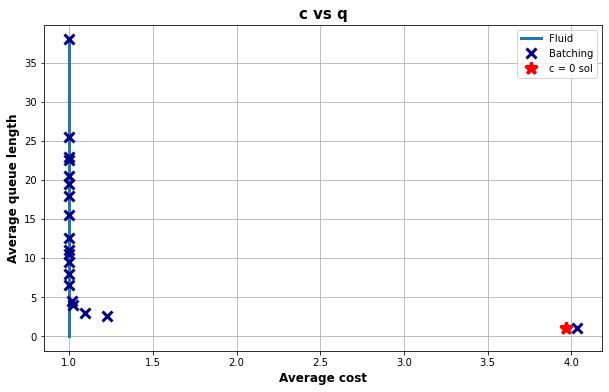

In [5]:
file_name = '../fc_2_39_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.27975958  0.38367952] [0.02632494]


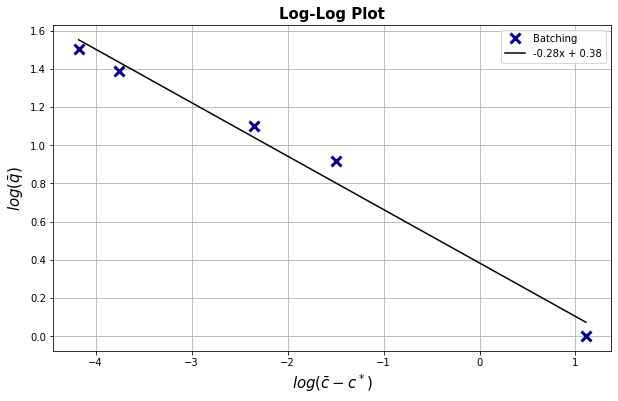

In [19]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[ 0.92605368 -2.00363409] [0.03499794]


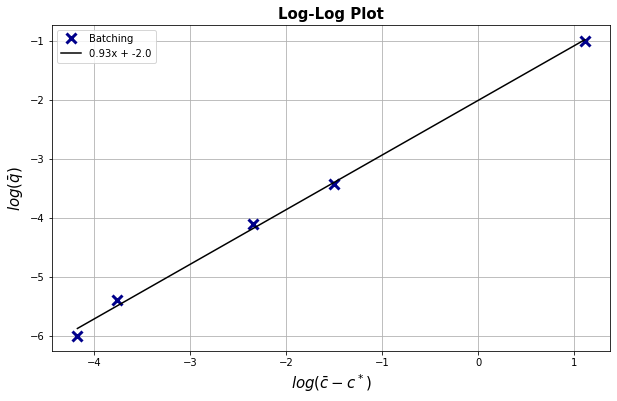

In [20]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = - average_queue_B[average_cost_B>Cstar_rand+0.01] - np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [6]:
r,c = C_paths_B.shape
print(r,c)
cost_lists= []
Tbatches = np.max(Q_paths_B,axis=0)
for i in range(c):
    arr = np.delete(C_paths_B[:,i],np.where(C_paths_B[:,i] == 0))
    cost_lists.append(arr/Tbatches[i])

200000 19


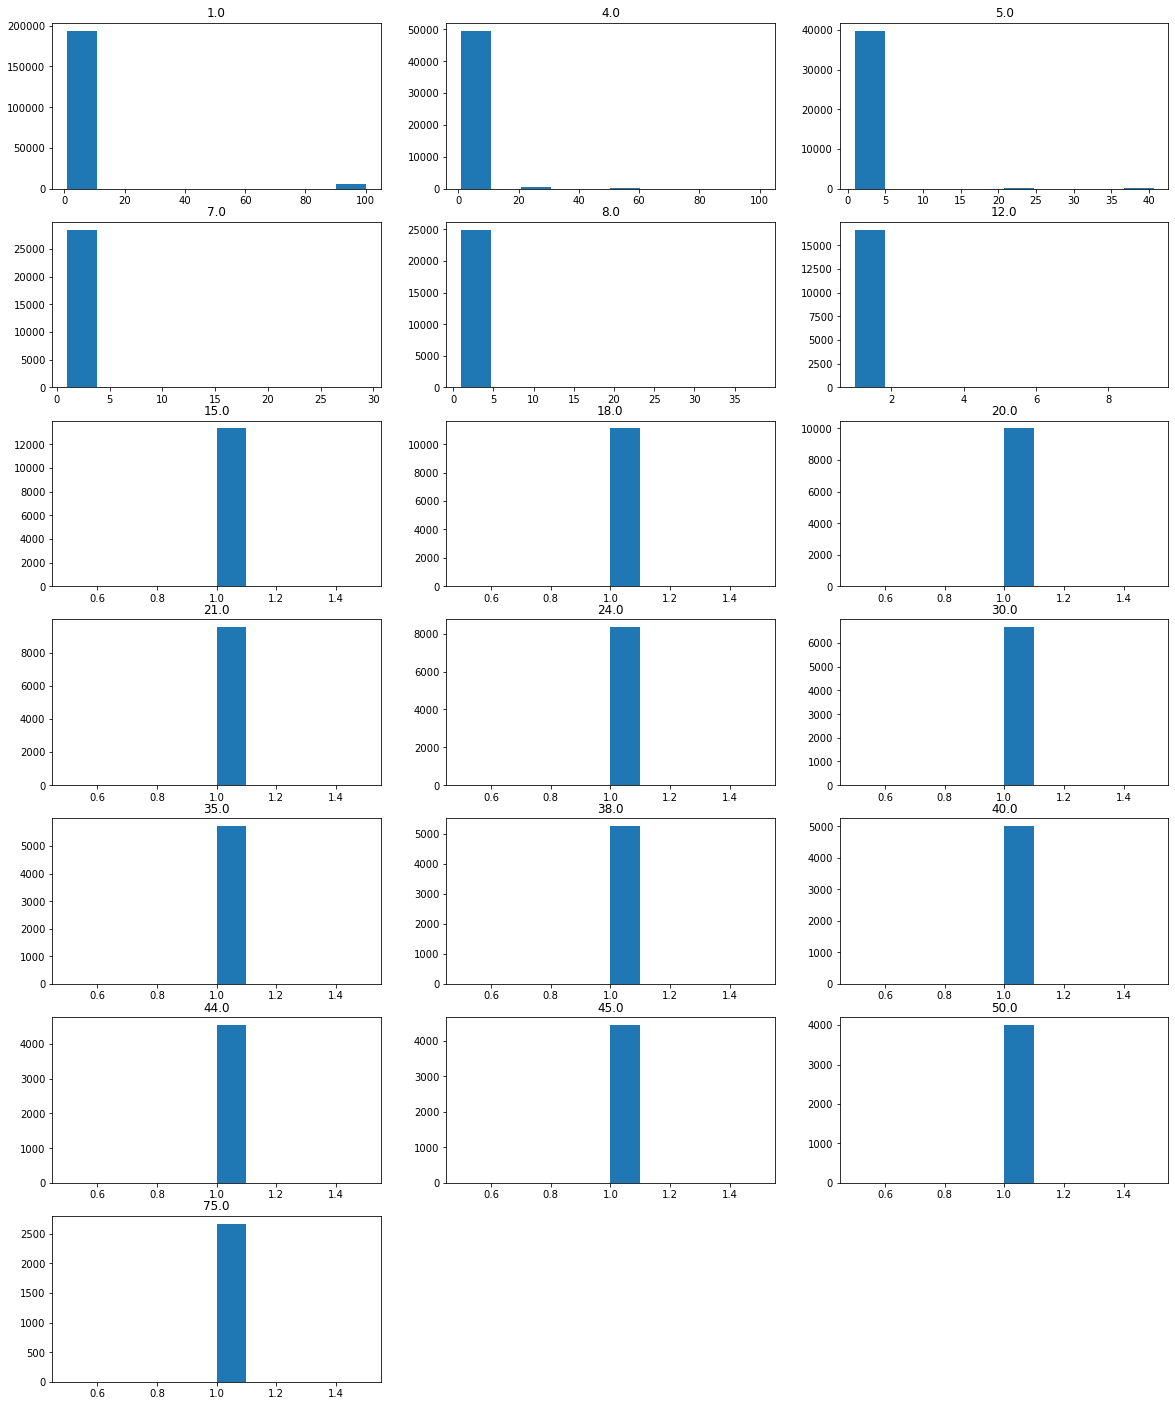

In [9]:
plt.figure(figsize=(20,25))
for i in range(c):
    plt.subplot(7,3,i+1)
    plt.hist(cost_lists[i])
    plt.title(str(Tbatches[i]))

PMFs
[0.4 0.6] [0.4 0.6]
average cost B [24.7195286  14.19795396 13.04315608 11.05657085 10.50438018  8.92477199
  8.03709593  7.36130861  7.14405941  6.86525855  6.68282731  5.94257426
  5.45967798  5.2200016   5.46975395  5.10148515  5.03217822  4.89018755
  3.93657914]
1.0000000000188318


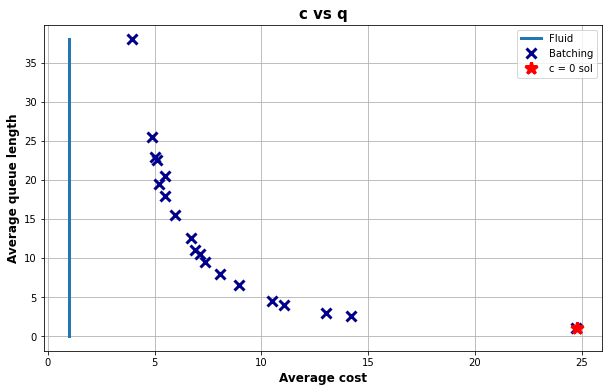

In [11]:
file_name = '../fc_2_44_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-1.81123133  5.63122617] [0.04645802]


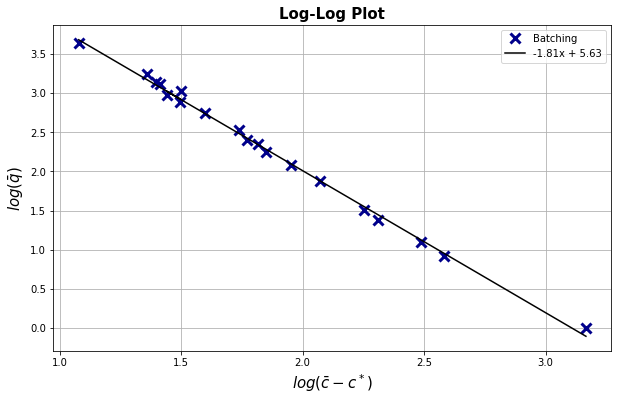

In [12]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [13]:
r,c = C_paths_B.shape
print(r,c)
cost_lists= []
Tbatches = np.max(Q_paths_B,axis=0)
for i in range(c):
    arr = np.delete(C_paths_B[:,i],np.where(C_paths_B[:,i] == 0))
    cost_lists.append(arr/Tbatches[i])

200000 19


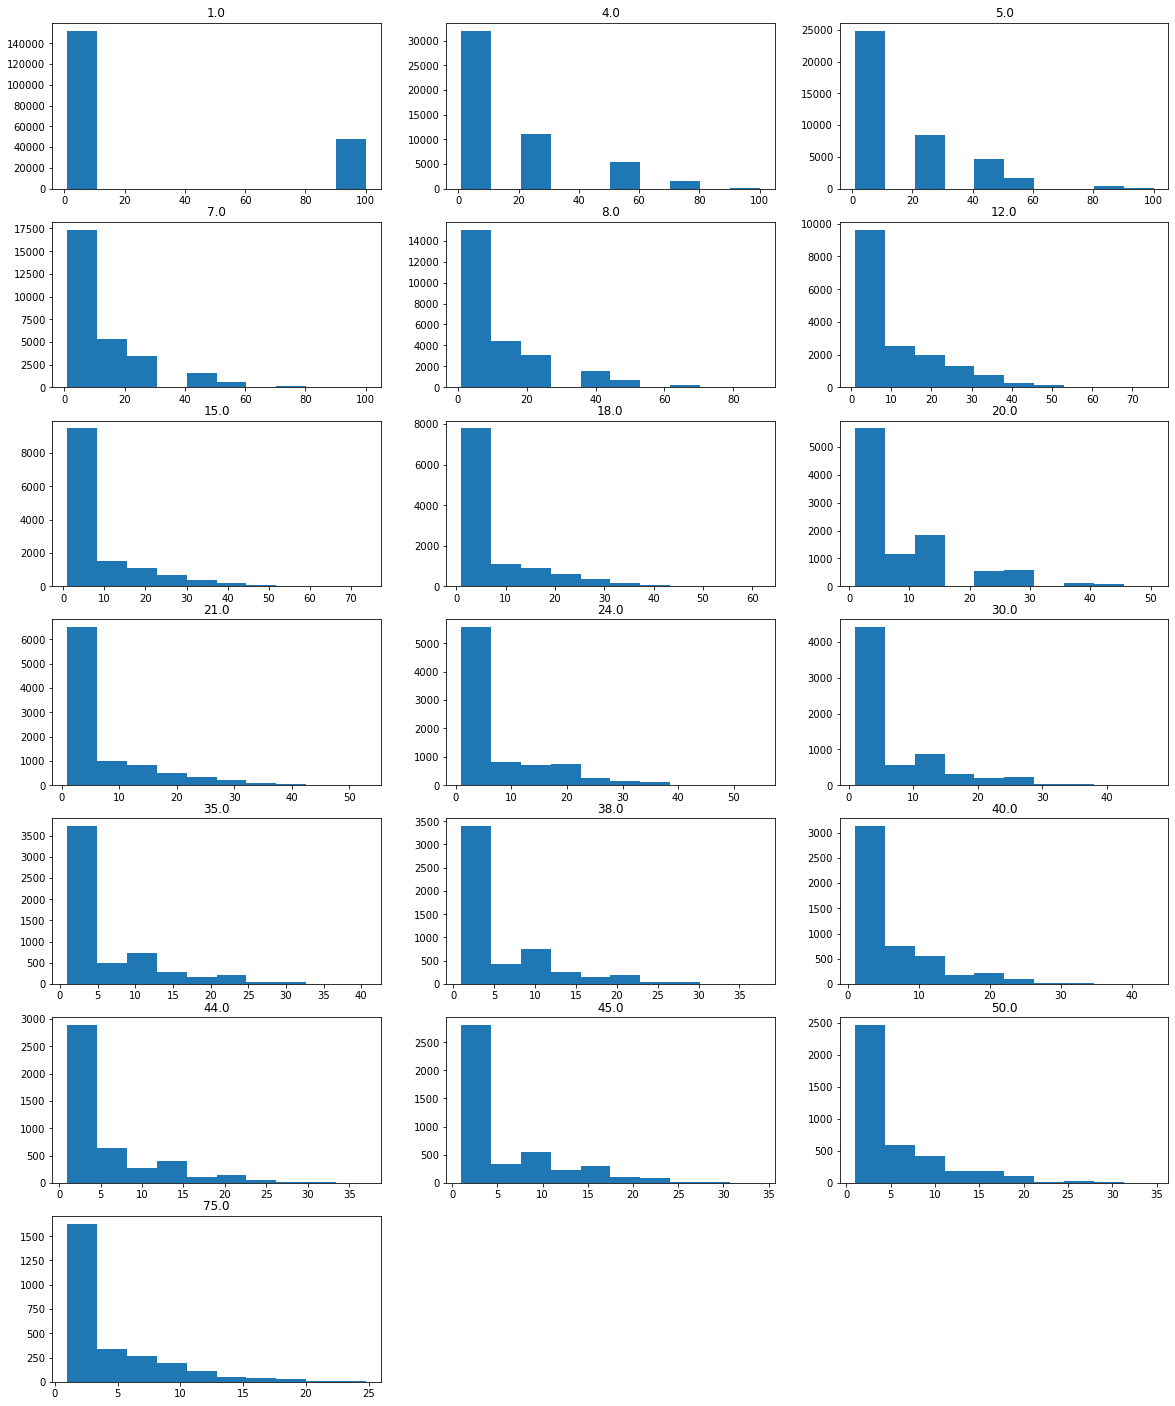

In [14]:
plt.figure(figsize=(20,25))
for i in range(c):
    plt.subplot(7,3,i+1)
    plt.hist(cost_lists[i])
    plt.title(str(Tbatches[i]))

In [ ]:
for i in range(c):
    ad_test = stats.anderson(cost_lists[i], dist='norm')
    sl, cv = ad_test.significance_level[2], ad_test.critical_values[2]
    if ad_test.statistic < cv:
        print('Significance level {} : Sample looks Gaussian (fail to reject H0)'.format(sl))
    else:
        print('Significance level {} : Sample does not look Gaussian (reject H0)'.format(sl))

PMFs
[0.7 0.3] [0.7 0.3]
average cost B [21.57824289 13.14358287 11.95412885 10.38138072  9.82372795  8.35450918
  7.6559364   7.13657637  6.70594059  6.50833321  6.25859534  5.60148515
  5.24087704  5.12792884  5.13605721  4.83267327  4.66683168  4.52676669
  3.98015004]
1.0000000000370561


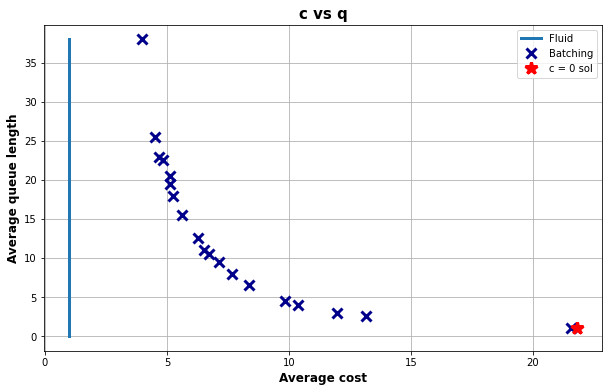

In [15]:
file_name = '../fc_2_77_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-1.88264992  5.63374422] [0.02020297]


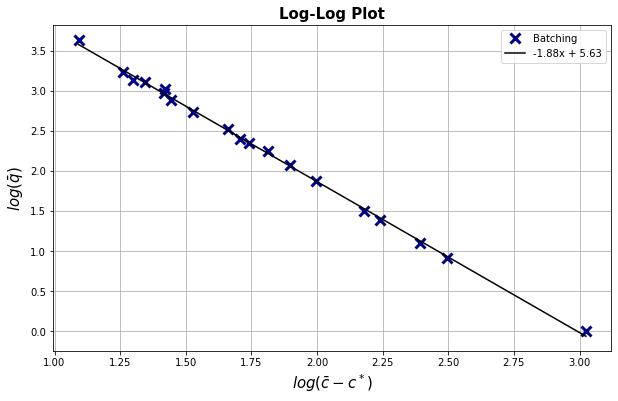

In [16]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[ 19.24273539 -50.09819495] [343.89471022]


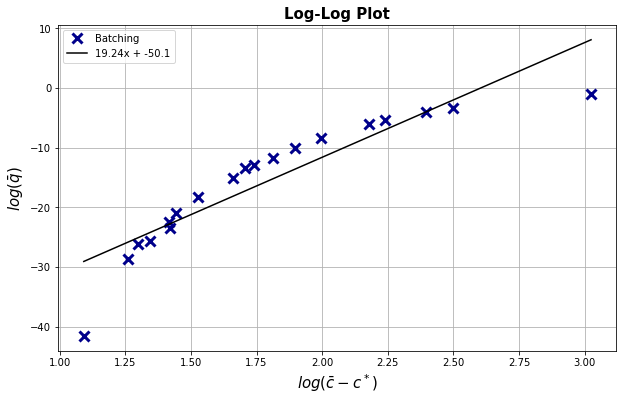

In [19]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = - average_queue_B[average_cost_B>Cstar_rand+0.01] - np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [17]:
r,c = C_paths_B.shape
print(r,c)
cost_lists= []
Tbatches = np.max(Q_paths_B,axis=0)
for i in range(c):
    arr = np.delete(C_paths_B[:,i],np.where(C_paths_B[:,i] == 0))
    cost_lists.append(arr/Tbatches[i])

200000 19


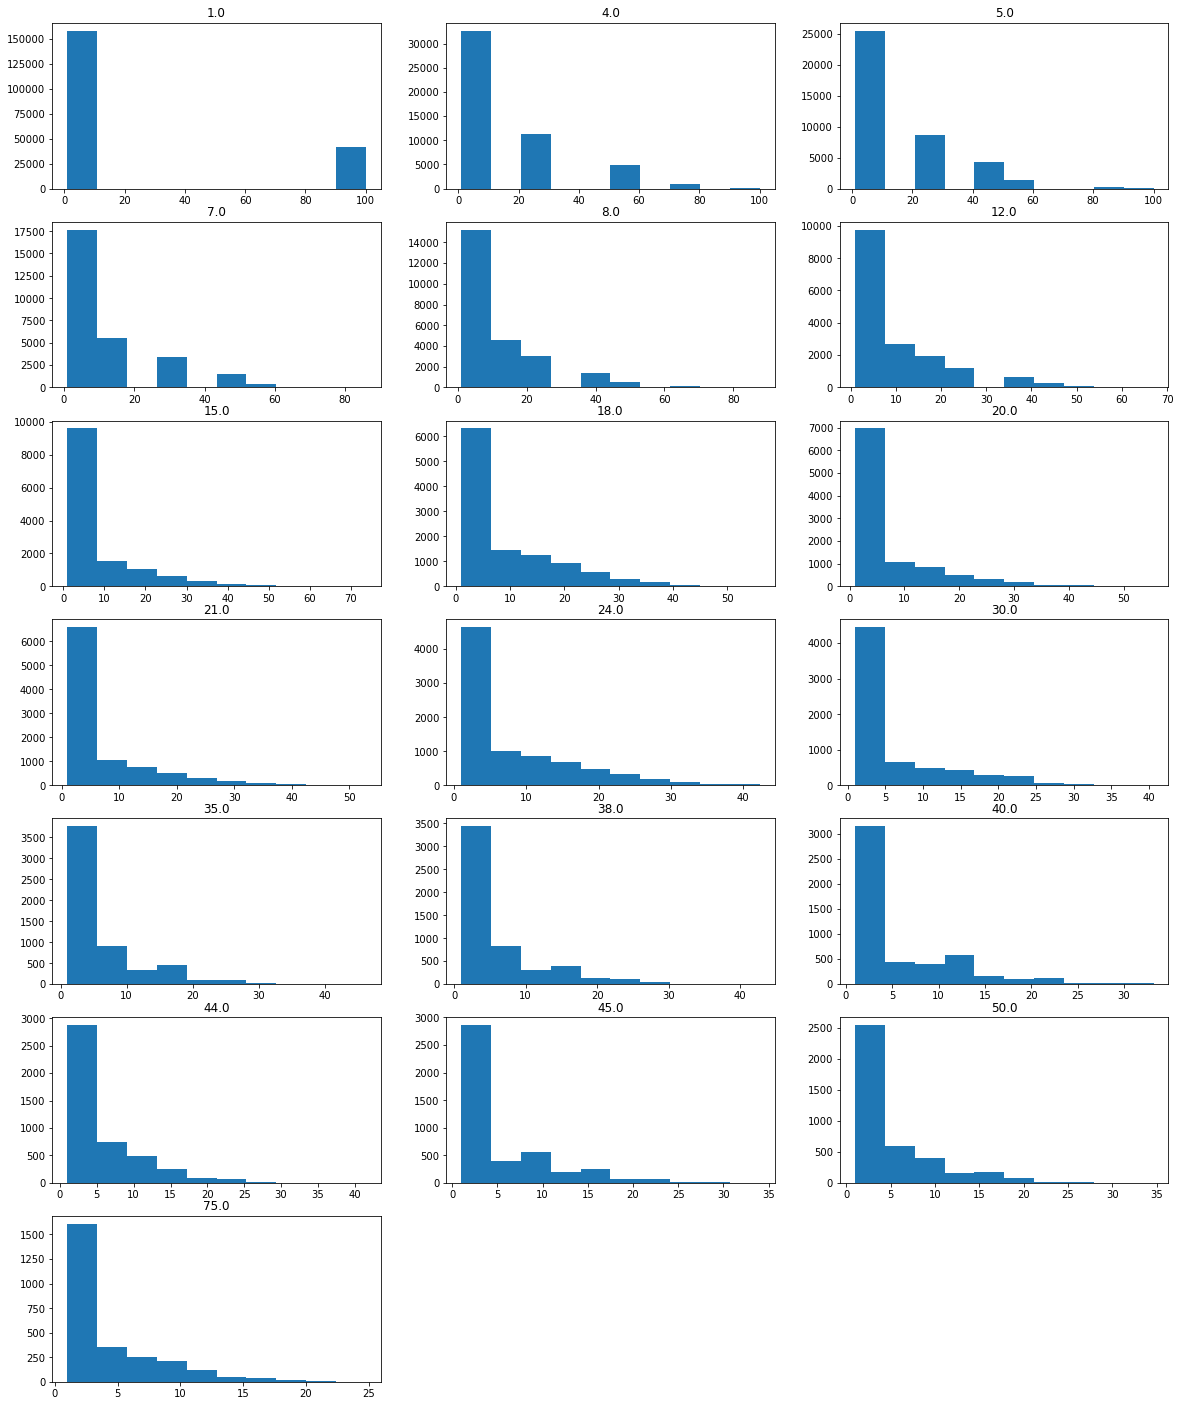

In [18]:
plt.figure(figsize=(20,25))
for i in range(c):
    plt.subplot(7,3,i+1)
    plt.hist(cost_lists[i])
    plt.title(str(Tbatches[i]))

In [ ]:
for i in range(c):
    ad_test = stats.anderson(cost_lists[i], dist='norm')
    sl, cv = ad_test.significance_level[2], ad_test.critical_values[2]
    if ad_test.statistic < cv:
        print('Significance level {} : Sample looks Gaussian (fail to reject H0)'.format(sl))
    else:
        print('Significance level {} : Sample does not look Gaussian (reject H0)'.format(sl))

PMFs
[0.8 0.2] [0.2 0.8]
average cost B [64.4603073  60.56206624 60.67720693 60.36327045 60.1400156  60.60186907
 60.23714093 60.42088921 60.32029703 60.55257197 60.29693688 60.49950495
 60.48860943 60.54236627 60.36435287 60.42128713 60.60940594 60.42327082
 60.44258065]
60.39999995102259


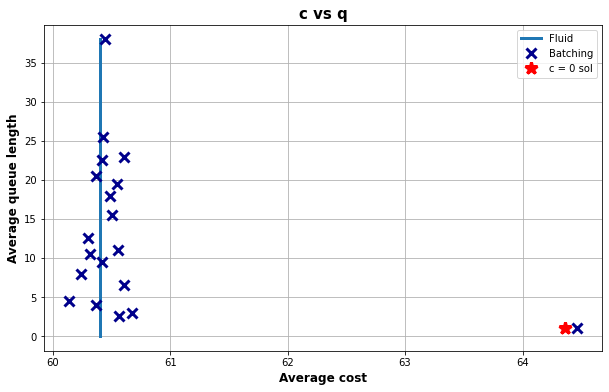

In [20]:
file_name = '../fc_2_82_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.57342404  1.09013762] [6.03621178]


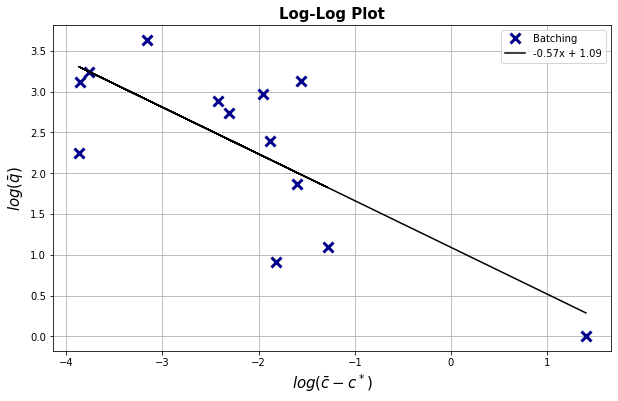

In [ ]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [13]:
fluid_sol

{'X': array([[ 2.00000000e-01,  6.00000000e-01],
        [-4.91608801e-10,  2.00000000e-01]]),
 'Cost': 60.39999995102259}

In [14]:
W

array([[  1, 100],
       [  1,   1]], dtype=int64)

In [ ]:
0.3, 0.4
0.7, 0.6

0.3 0.9
0.7 0.1

[ 5.14260848 -6.26536297] [1040.1671324]


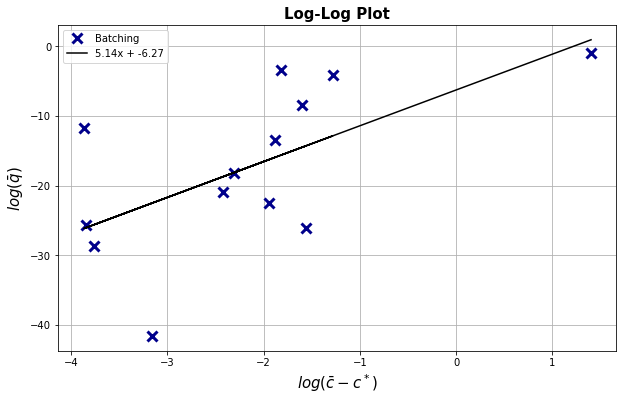

In [16]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = - average_queue_B[average_cost_B>Cstar_rand+0.01] - np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [22]:
r,c = C_paths_B.shape
print(r,c)
cost_lists= []
Tbatches = np.max(Q_paths_B,axis=0)
for i in range(c):
    arr = np.delete(C_paths_B[:,i],np.where(C_paths_B[:,i] == 0))
    cost_lists.append(arr/Tbatches[i])

200000 19


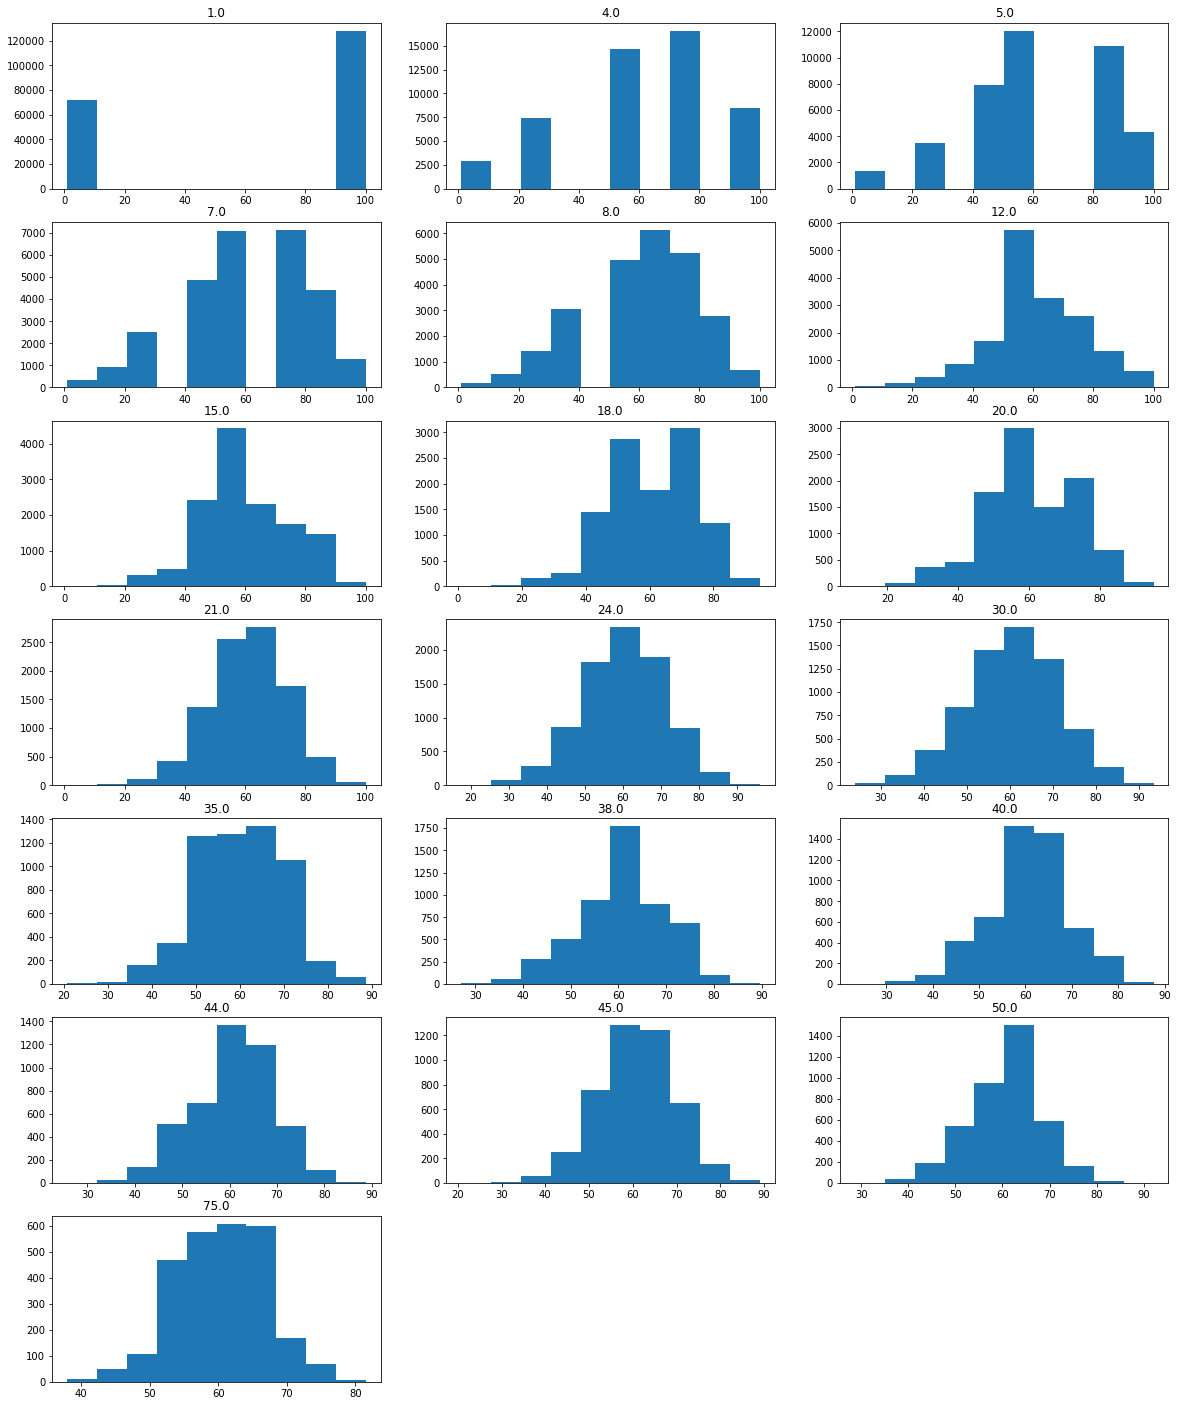

In [23]:
plt.figure(figsize=(20,25))
for i in range(c):
    plt.subplot(7,3,i+1)
    plt.hist(cost_lists[i])
    plt.title(str(Tbatches[i]))

In [24]:
for i in range(c):
    ad_test = stats.anderson(cost_lists[i], dist='norm')
    sl, cv = ad_test.significance_level[2], ad_test.critical_values[2]
    if ad_test.statistic < cv:
        print('Significance level {} : Sample looks Gaussian (fail to reject H0)'.format(sl))
    else:
        print('Significance level {} : Sample does not look Gaussian (reject H0)'.format(sl))

Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject H0)
Significance level 5.0 : Sample does not look Gaussian (reject

In [25]:
print(pmf_cust, pmf_serv)

[0.8 0.2] [0.2 0.8]


In [34]:
run_extremes(2,np.asarray([[1,10000],[1,1]]),[0.8,0.2],pmf_serv)

[6400.36,
 {'X': array([[ 2.00000000e-01,  5.99999999e-01],
         [-3.90945506e-10,  2.00000000e-01]]), 'Cost': 6000.399994282088}]

In [28]:
W

array([[  1, 100],
       [  1,   1]], dtype=int64)

In [31]:
np.asarray([[1,100],[1,1]])

array([[  1, 100],
       [  1,   1]])

# W1k

PMFs
[0.3 0.7] [0.1 0.9]
average cost B [272.01007505 251.02722527 231.11426229 218.3895689  213.11616465
 210.83046152 208.14594084 208.38759469 205.11272613 204.90630063
 203.76928039 201.71212348 199.05657066 200.20057003 200.73106693
 200.65511602 200.44032403 201.01980198 198.05705926 204.34733683]
200.79999999353194


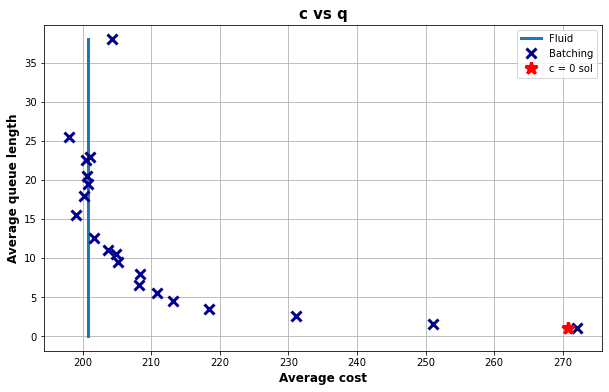

In [3]:
file_name = '../fc_2_31_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.56462117  2.94523543] [3.20468826]


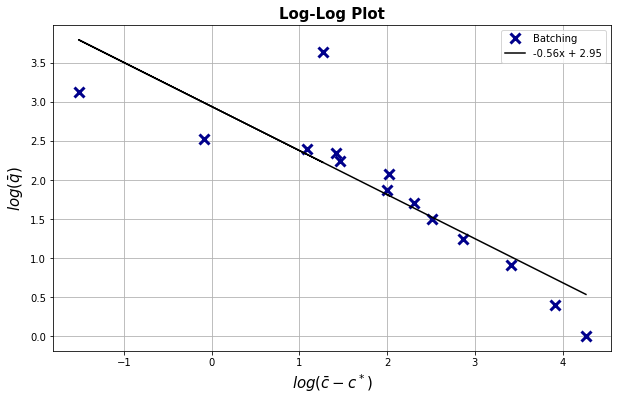

In [4]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[  4.80938049 -20.92833595] [806.49312661]


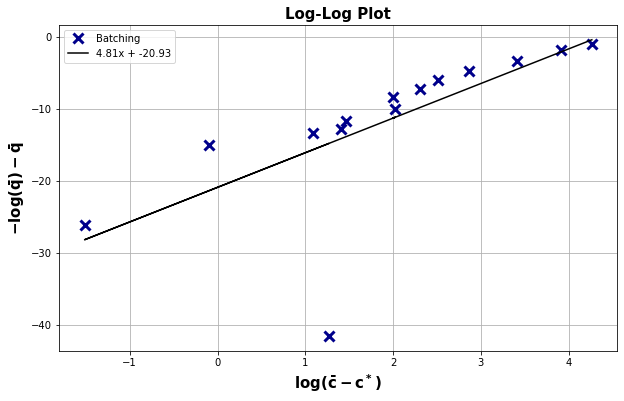

In [6]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = - average_queue_B[average_cost_B>Cstar_rand+0.01] - np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.3 0.7] [0.2 0.8]
average cost B [241.61534808 207.11574116 172.65161303 153.56880569 143.09345374
 137.06560828 131.57951818 125.77322433 122.44464945 119.7180468
 118.97694304 113.37701008 109.56219622 109.73659683 108.76536296
 110.02769054 109.22250225 108.79288929 106.39087772 104.29245311]
100.9000002365633


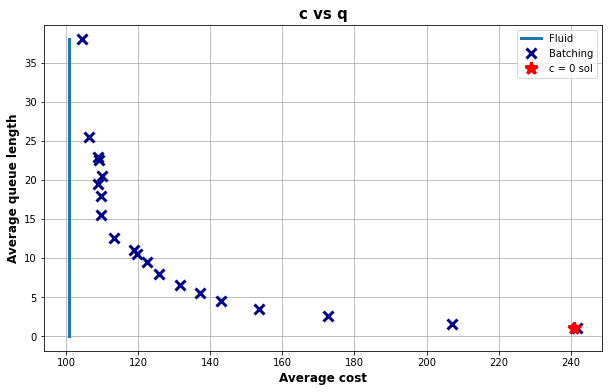

In [7]:
file_name = '../fc_2_32_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.95665935  5.02071428] [0.39298158]


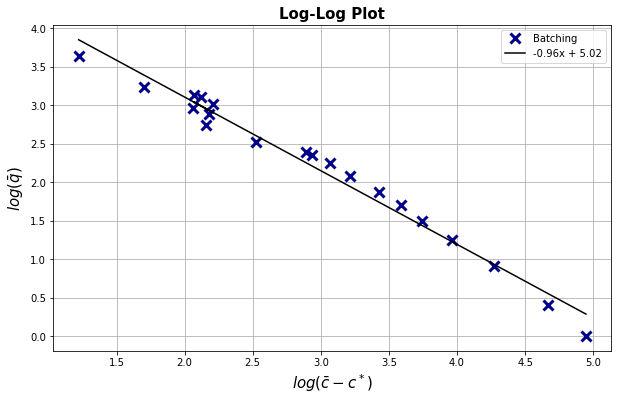

In [8]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.3 0.7] [0.3 0.7]
average cost B [208.82300912 165.24723247 125.42294346 104.76716767  92.1124445
  81.11381569  74.10474919  66.16140404  61.5100351   58.04360936
  57.28844452  53.57947318  47.20337534  44.1439722   42.05513665
  42.40184537  40.32457246  39.69513951  36.84309077  29.86832708]
1.0000000000051616


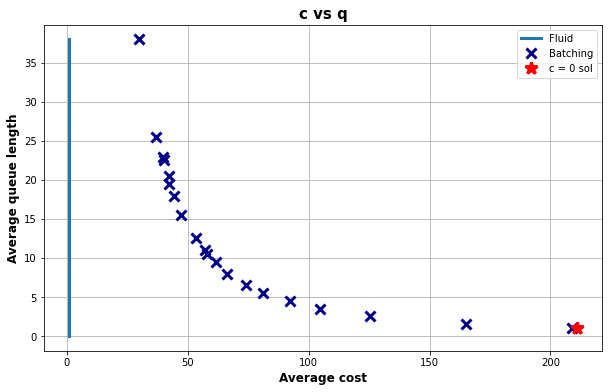

In [10]:
file_name = '../fc_2_33_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-1.86612313  9.91801813] [0.01394049]


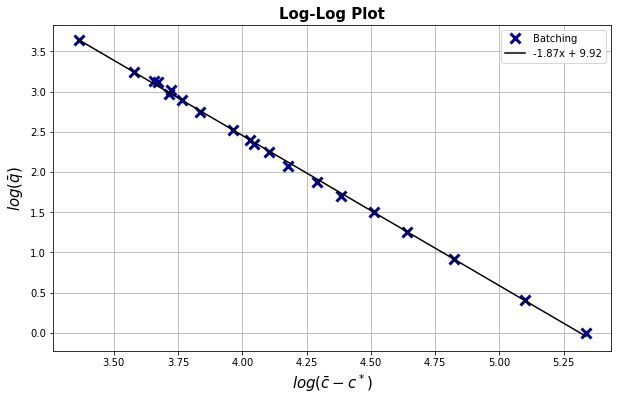

In [11]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.3 0.7] [0.4 0.6]
average cost B [180.48123741 130.56660067  85.41718834  66.12546125  52.34066363
  43.74934747  36.74065463  31.600135    26.1600666   23.84941494
  21.8459069   18.60308412  15.50693069  13.36324316  10.96032881
  10.9720144    9.67218722   9.14765977   7.56507127   4.42742686]
1.0000000004325242


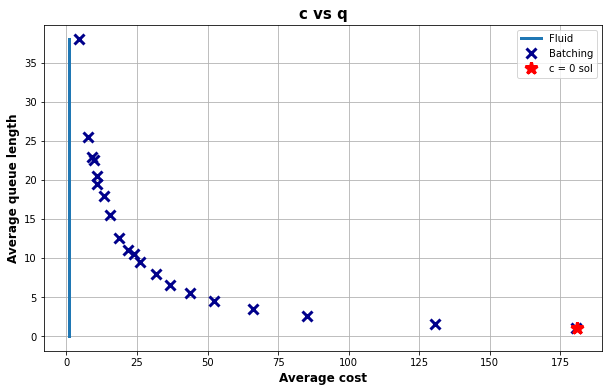

In [12]:
file_name = '../fc_2_34_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.93861553  5.14652169] [0.37142311]


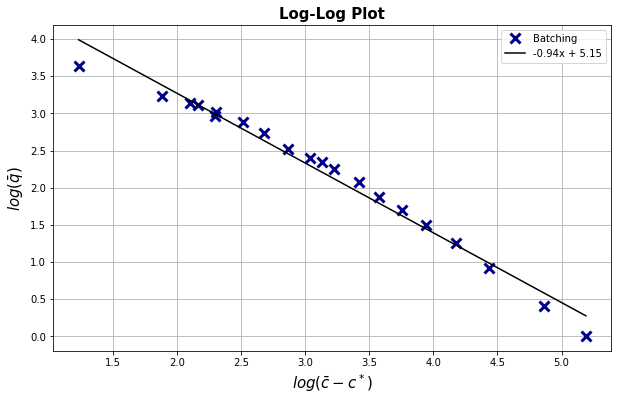

In [13]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.3 0.7] [0.5 0.5]
average cost B [150.18641093  99.07780578  56.16588332  37.72360724  27.90914137
  20.33661183  16.92469699  12.3838896    9.16191162   8.08861386
   6.84964222   5.73045422   3.84743474   2.90319016   2.8132394
   2.37389978   2.38375338   2.1439694    1.72445611   1.13489872]
1.0000000000040539


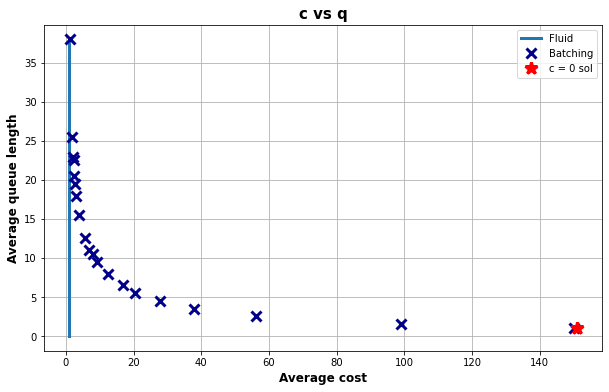

In [15]:
file_name = '../fc_2_35_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.46794574  3.20327525] [0.04351916]


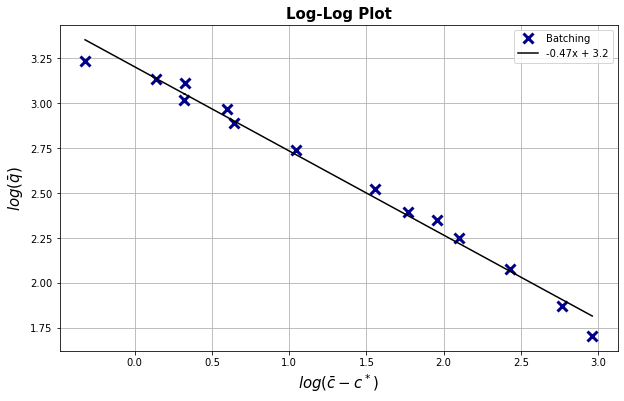

In [18]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 5
end = len(average_cost_B) - 1
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B[beg:end])
# xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
# yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.3 0.7] [0.6 0.4]
average cost B [121.03544518  70.42619926  35.13651273  20.42574926  12.97349394
   9.56185809   6.38982059   4.20687017   2.76325263   2.51363636
   2.15394309   1.85417917   1.23478848   1.13487174   1.17483024
   1.09492398   1.049955     1.05994599   1.03996999   1.        ]
1.000000000114042


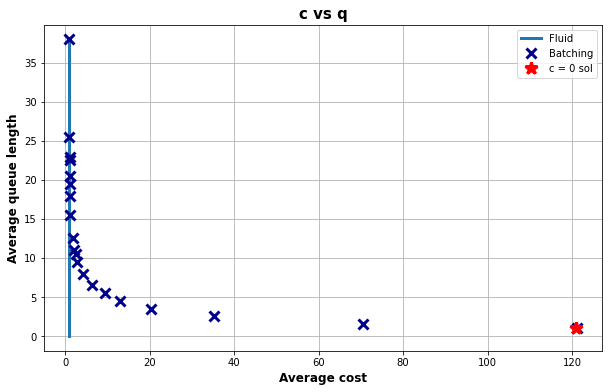

In [21]:
file_name = '../fc_2_36_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.2712924   2.38816375] [0.05435315]


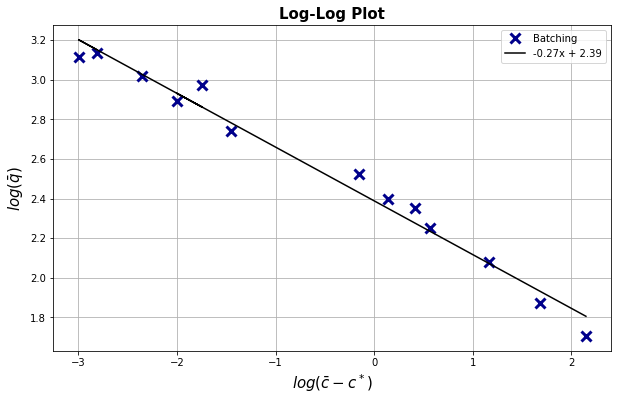

In [25]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 5
end = len(average_cost_B) -2
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B[beg:end])
# xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
# yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.3 0.7] [0.7 0.3]
average cost B [90.32103661 45.67073171 19.22212444  9.25182252  5.35081903  3.26784339
  2.36868475  1.62439061  1.2497525   1.26476148  1.14486731  1.0649376
  1.029973    1.00499525  1.          1.019984    1.          1.
  1.00499625  1.        ]
1.0000000002990732


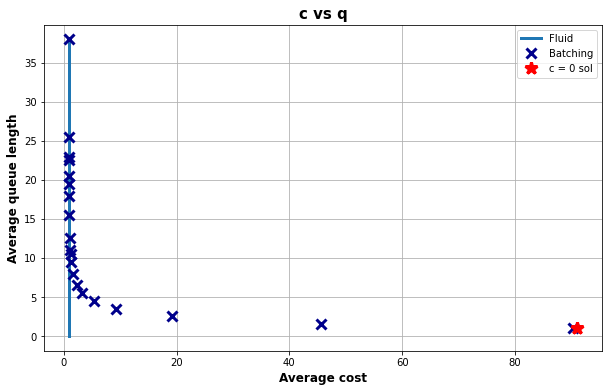

In [26]:
file_name = '../fc_2_37_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.32526214  1.80201591] [0.3563272]


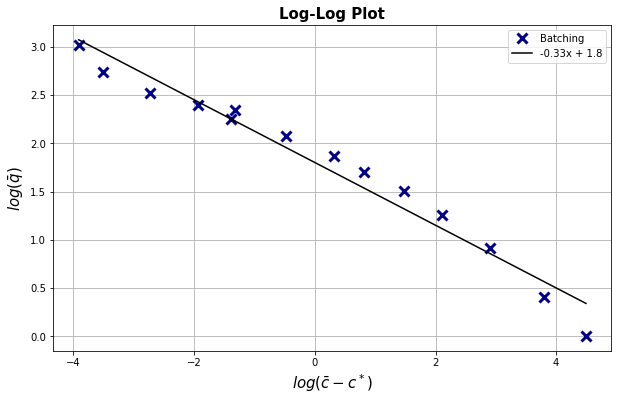

In [27]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[ 2.1683485  -9.42654371] [3.51314107]


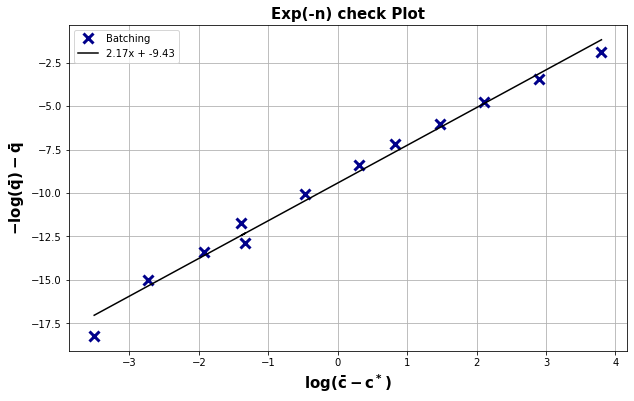

In [31]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 1
end = len(average_cost_B) - 1
average_queue_B = average_queue_B[average_cost_B>Cstar_rand+0.01]
average_cost_B = average_cost_B[average_cost_B>Cstar_rand+0.01]
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = - average_queue_B[beg:end] - np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Exp(-n) check Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.3 0.7] [0.8 0.2]
average cost B [61.87436937 27.14409144  8.43270865  3.61241112  2.09394876  1.40961048
  1.18981759  1.0599415   1.02497525  1.0149865   1.01498627  1.0099904
  1.          1.          1.          1.          1.          1.
  1.          1.        ]
1.0000000000065883


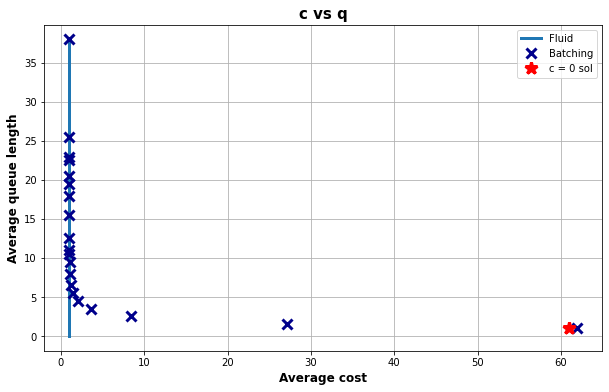

In [32]:
file_name = '../fc_2_38_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.2664085   1.35108063] [0.18376452]


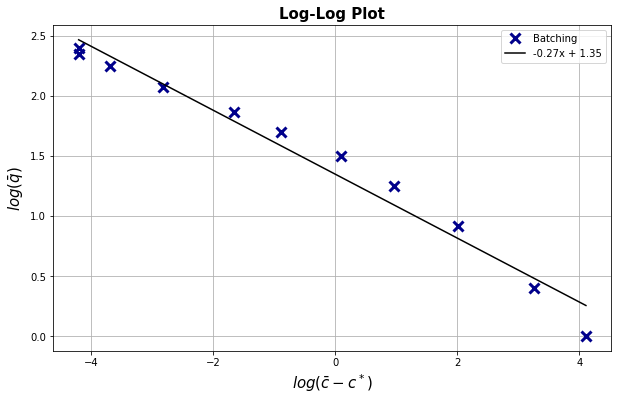

In [34]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B)
average_queue_B = average_queue_B[average_cost_B>Cstar_rand+0.01]
average_cost_B = average_cost_B[average_cost_B>Cstar_rand+0.01]
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[ 1.4479001  -6.25435275] [0.72469141]


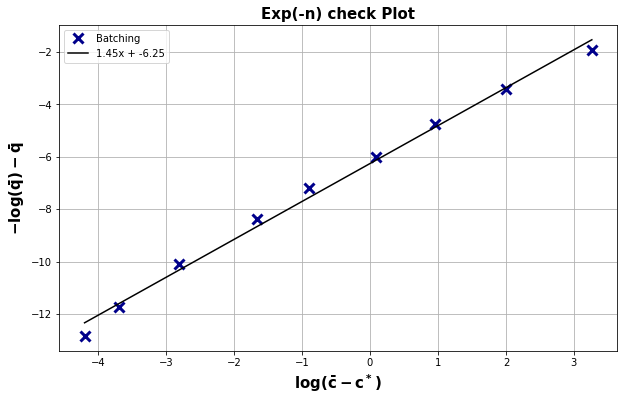

In [35]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 1
end = len(average_cost_B) - 1
average_queue_B = average_queue_B[average_cost_B>Cstar_rand+0.01]
average_cost_B = average_cost_B[average_cost_B>Cstar_rand+0.01]
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = - average_queue_B[beg:end] - np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Exp(-n) check Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.3 0.7] [0.9 0.1]
average cost B [30.6604583  12.28881289  3.21282926  1.52448024  1.17483199  1.0299715
  1.0049952   1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.        ]
0.9999999999335304


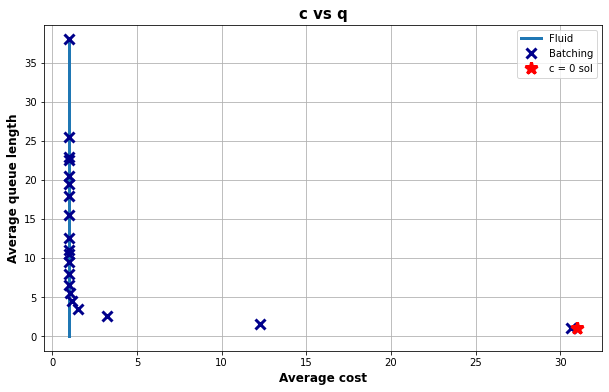

In [36]:
file_name = '../fc_2_39_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.24903772  0.99340543] [0.07893311]


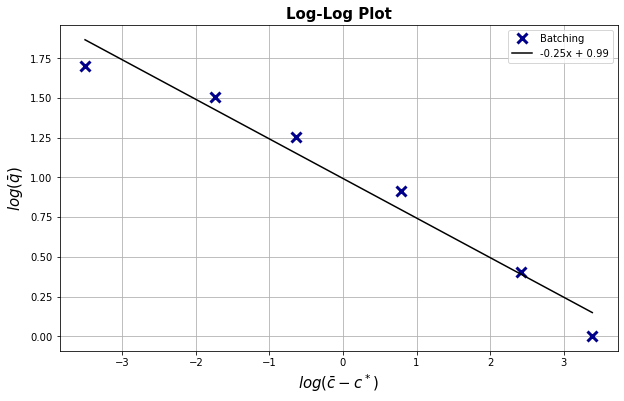

In [37]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B)
average_queue_B = average_queue_B[average_cost_B>Cstar_rand+0.01]
average_cost_B = average_cost_B[average_cost_B>Cstar_rand+0.01]
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[ 0.97402334 -4.22146192] [0.01952876]


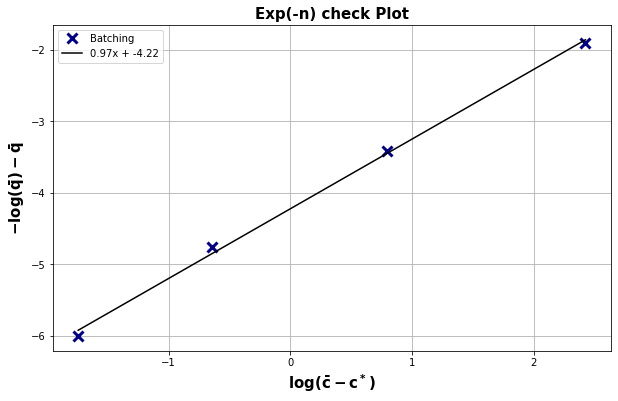

In [38]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 1
end = len(average_cost_B) - 1
average_queue_B = average_queue_B[average_cost_B>Cstar_rand+0.01]
average_cost_B = average_cost_B[average_cost_B>Cstar_rand+0.01]
xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
yB2 = - average_queue_B[beg:end] - np.log(average_queue_B[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Exp(-n) check Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

## W1k 8x stuff

PMFs
[0.8 0.2] [0.1 0.9]
average cost B [721.46741734 705.12222122 701.47284946 701.37593376 700.30799232
 699.55570779 699.81346754 698.80895522 701.36094861 701.79864986
 700.35445013 702.09127865 698.52659766 699.18106405 698.78746862
 697.8119924  698.90625563 700.48483348 701.70894224 697.68196549]
700.2999993326615


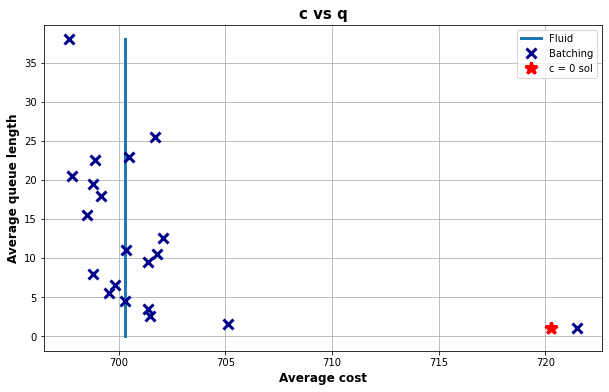

In [39]:
file_name = '../fc_2_81_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

PMFs
[0.8 0.2] [0.2 0.8]
average cost B [639.94860974 614.27225272 603.31913638 599.53186032 599.68968259
 597.60266013 600.14924097 601.88854721 599.57182072 601.21426643
 600.69073371 603.04146166 599.2959946  600.62478624 599.86352091
 600.55487598 601.21426643 599.35594059 601.61408852 598.09173293]
600.3999994878448


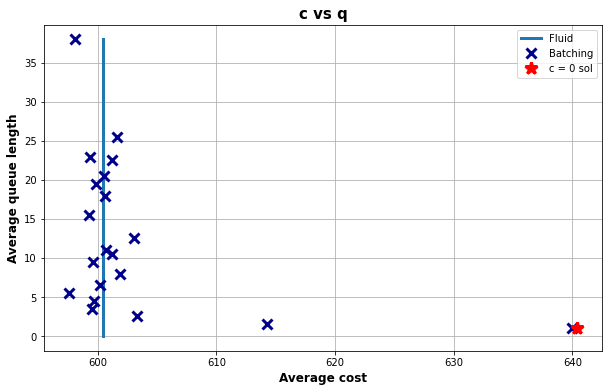

In [41]:
file_name = '../fc_2_82_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

PMFs
[0.8 0.2] [0.3 0.7]
average cost B [559.2190161  525.7799478  508.44220884 503.21231212 500.22526401
 502.65295265 500.5699328  500.8121953  500.38511385 501.12943294
 501.41166499 502.72286391 500.98955896 500.480019   500.4500485
 500.32014403 500.69482448 501.52907291 499.33587397 504.30714179]
500.50000006082456


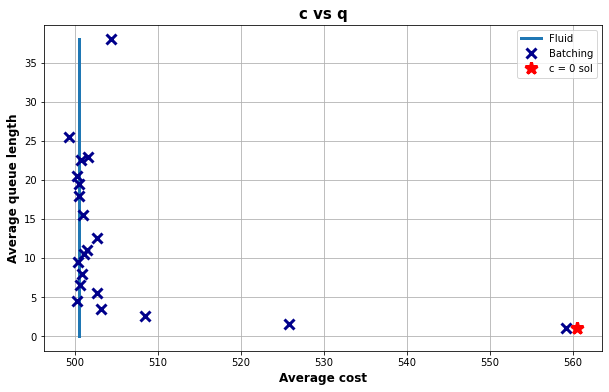

In [53]:
file_name = '../fc_2_83_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.45700076  1.86870756] [0.00025071]


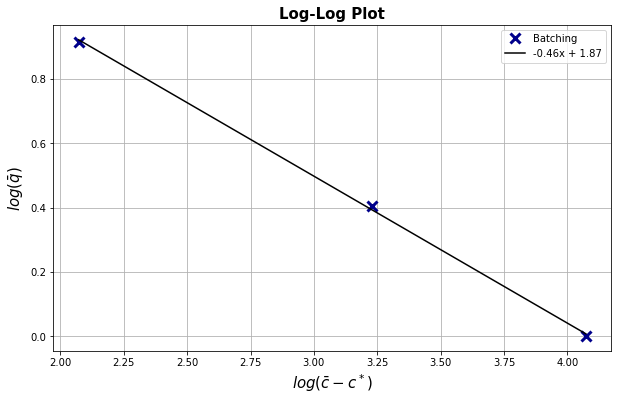

In [55]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])

m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[ 1.2136509  -5.89989747] [0.00835504]


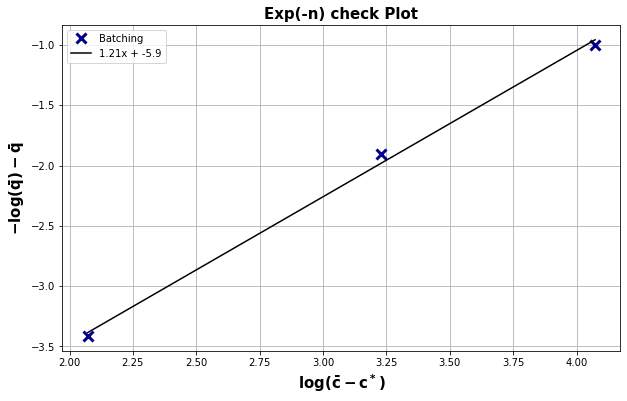

In [ ]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = - average_queue_B_p[beg:end] - np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Exp(-n) check Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.8 0.2] [0.4 0.6]
average cost B [481.94597973 440.11484115 415.41346827 408.04662047 403.16353654
 402.68301915 402.40426617 400.86973674 400.97862479 397.92740774
 398.57085852 400.37121985 401.35432043 397.96750338 399.08846765
 400.97469994 402.18856886 403.09774977 401.53929482 397.46735184]
400.60000010877286


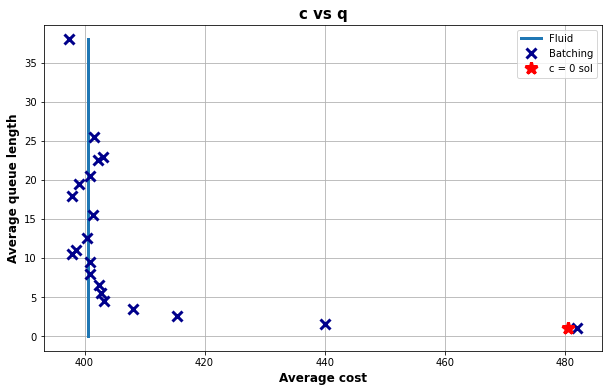

In [63]:
file_name = '../fc_2_84_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.52361125  2.31639404] [0.00065637]


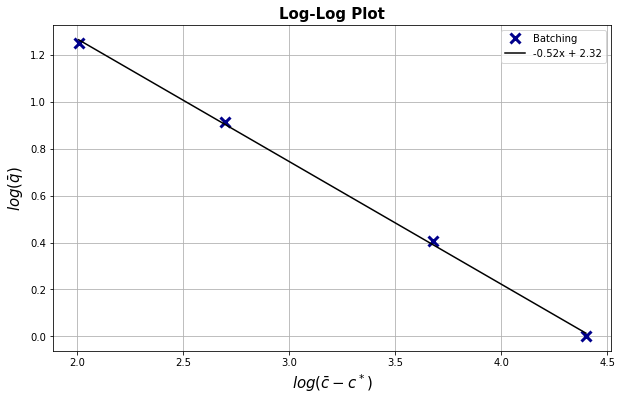

In [64]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])

m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[ 1.56403664 -7.76520607] [0.05906864]


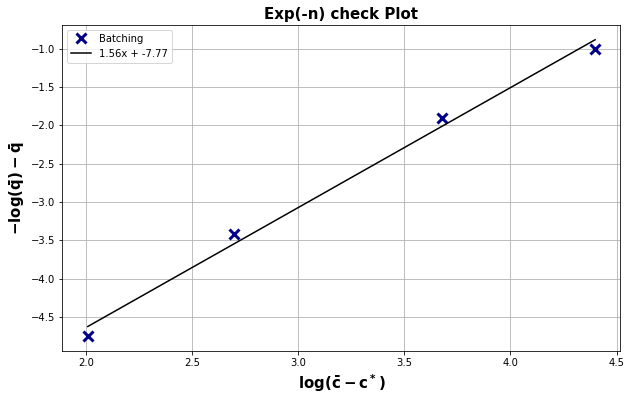

In [65]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = - average_queue_B_p[beg:end] - np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Exp(-n) check Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.8 0.2] [0.5 0.5]
average cost B [401.41618708 358.7504725  327.50470509 314.64418144 308.82918817
 307.1039102  304.53331633 302.81044026 301.05764558 299.38618362
 300.89032568 299.87779011 300.59009901 300.72497625 301.87785634
 301.59927986 300.83987399 299.15139514 300.34526632 300.37024756]
300.700000015497


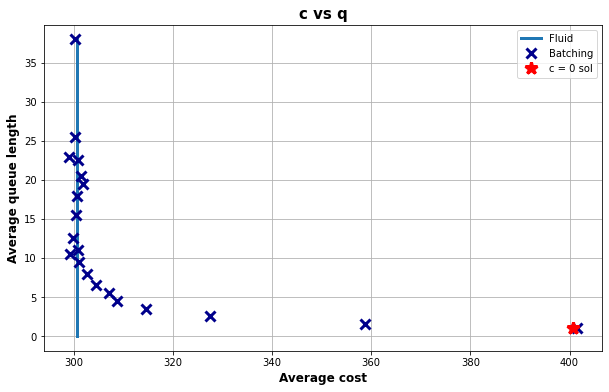

In [66]:
file_name = '../fc_2_85_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.5745572   2.72642876] [0.02311655]


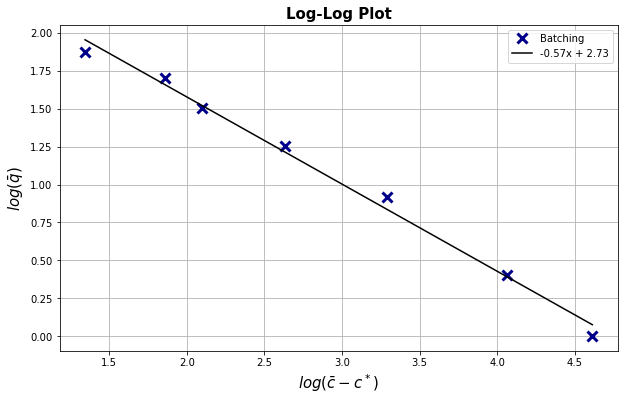

In [67]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])

m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[  2.25625819 -11.07708332] [0.63662456]


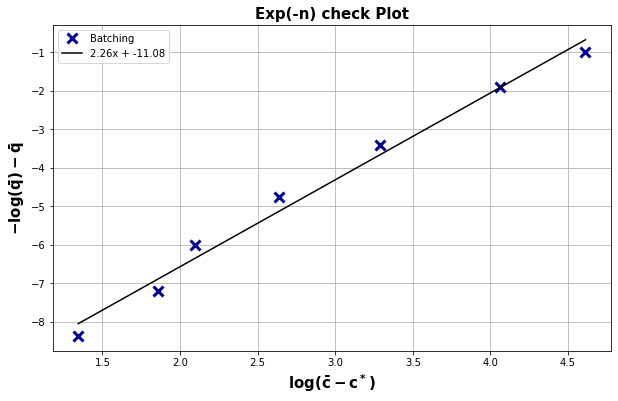

In [68]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = - average_queue_B_p[beg:end] - np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Exp(-n) check Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.8 0.2] [0.6 0.4]
average cost B [318.56370782 280.78273783 248.19750395 231.36670867 223.09157866
 216.01053553 213.89042062 208.40258006 207.51534515 205.72056706
 206.01222604 203.22566903 203.77232223 202.62826141 199.82194966
 204.18229146 204.23690369 201.30954095 200.12051013 200.56018005]
200.80000001039772


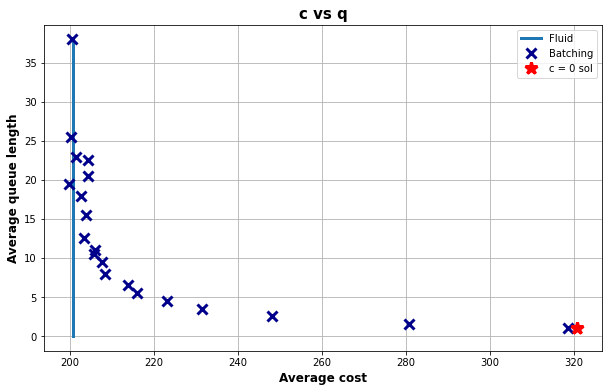

In [69]:
file_name = '../fc_2_86_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.83064934  4.03967159] [0.02408222]


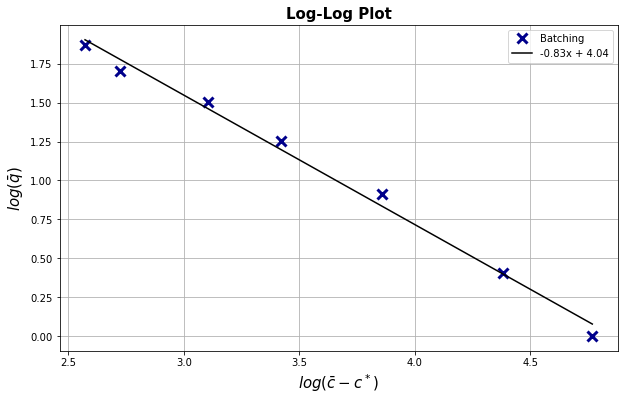

In [73]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])

m = 1.05
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.8 0.2] [0.7 0.3]
average cost B [241.65031325 206.31153812 173.06620632 155.27211772 145.31132245
 136.40124006 130.975099   124.43952599 120.66141661 118.6889739
 118.56731822 113.29708688 113.26885689 108.2779839  109.0201156
 106.72533507 107.24428443 107.97862286 108.15455364 102.70864216]
100.90000023656344


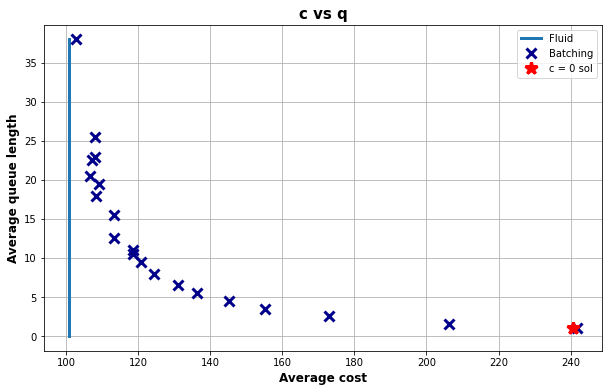

In [75]:
file_name = '../fc_2_87_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.9519679   4.99133617] [0.38182364]


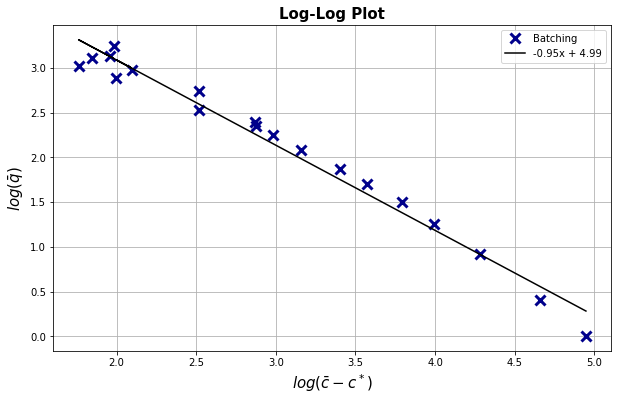

In [78]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])

m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p) -1

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.8 0.2] [0.8 0.2]
average cost B [160.20143601 134.00319503 106.47652953  88.64314643  77.68630745
  70.43896695  64.90359114  57.66469662  52.50396004  51.48951395
  51.04416375  48.31952778  42.0680018   38.24458223  38.20887127
  35.38746249  33.65058506  34.50481548  33.4856114   26.8555889 ]
0.9999999994084389


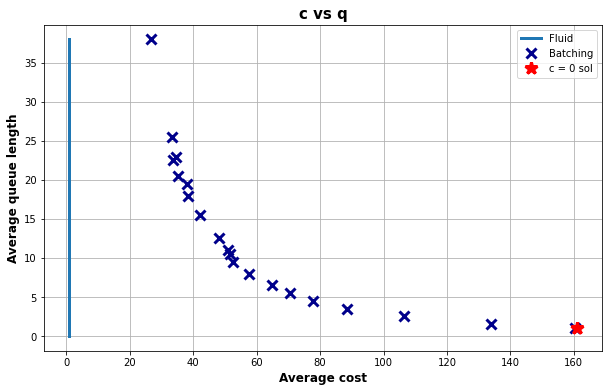

In [79]:
file_name = '../fc_2_88_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-1.9733087  10.06581376] [0.03069227]


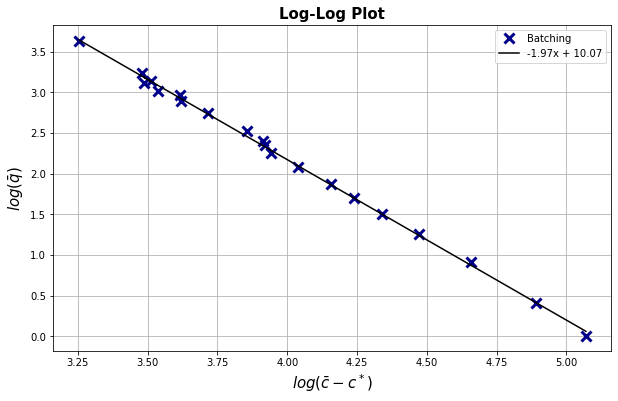

In [80]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])

m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[ 19.51481299 -92.93419166] [333.99277062]


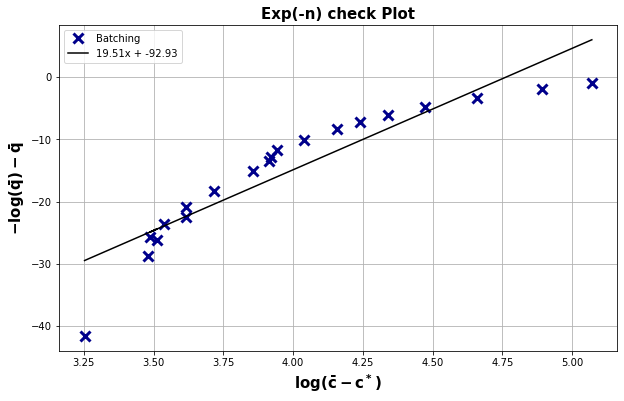

In [81]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = - average_queue_B_p[beg:end] - np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Exp(-n) check Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.8 0.2] [0.9 0.1]
average cost B [80.96535483 67.35923859 48.06383128 37.22909729 30.03210128 23.58851943
 20.63113525 16.38498462 13.46264963 11.85022502 11.34052894  9.31201248
  7.03955896  5.23097655  5.00111503  5.03177135  4.40693069  3.83244824
  3.32325581  1.90432108]
0.9999999999105635


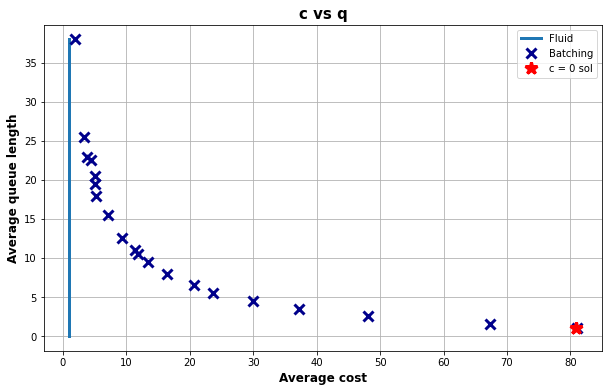

In [82]:
file_name = '../fc_2_89_batch_w1k.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.79445332  4.05170601] [0.97847297]


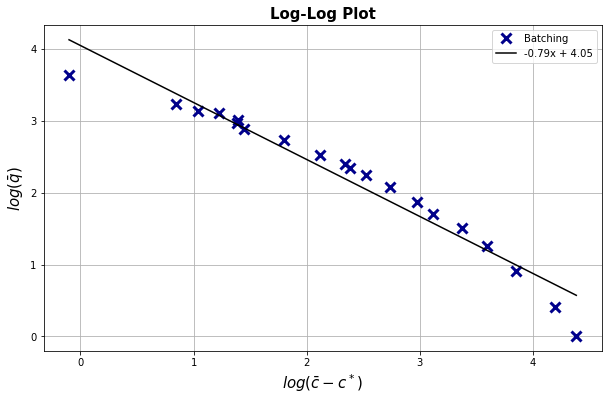

In [83]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])

m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[  7.95677672 -33.3157437 ] [38.14565991]


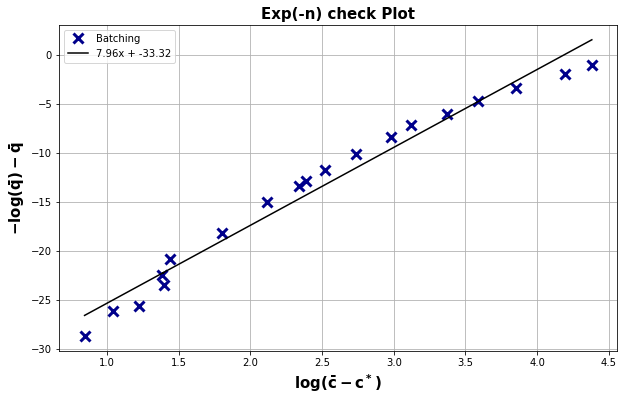

In [85]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
m = 1.01
c = 0

average_queue_B_p = average_queue_B[average_cost_B>Cstar_rand*m+c]
average_cost_B_p = average_cost_B[average_cost_B>Cstar_rand*m+c]

beg = 0
end = len(average_cost_B_p)-1

xB2 = np.log(average_cost_B_p[beg:end]-Cstar_rand)
yB2 = - average_queue_B_p[beg:end] - np.log(average_queue_B_p[beg:end])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$\mathbf{-log(\bar{q})-\bar{q}}$", weight='bold',fontsize=15)
plt.xlabel(r"$\mathbf{log(\bar{c}-c^*)}$", weight='bold',fontsize=15)
plt.title("Exp(-n) check Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])